# Customer churn of a telecom company

We have the data of the telecom operator "Niedinogorazryva.com"  at our disposal. It contains personal data about some customers, information about their tariffs and contracts. If the user plans to leave, he or she will be offered promotional codes and special conditions.

The purpose of our research: using machine learning, affects the outflow of customers must be predicted and determined. In the future  it will allow us to develop a system of promotional codes and special conditions and reduce the outflow of customers. The study must be completed within 2 weeks, the AUC-ROC must be greater than 0.87.

### Description of services

The operator provides two main types of services:

1. Fixed telephone connection. It is possible to connect a telephone set to several lines at the same time.
2. Internet. The connection can be of two types: via a telephone line (DSL *, * from the English * digital subscriber line *, "digital subscriber line") or fiber optic cable (* Fiber optic *).

The following services are also available:

- Internet security: antivirus (*DeviceProtection*) and blocking of unsafe sites (*OnlineSecurity*);
- Dedicated technical support line (*TechSupport*);
- Cloud file storage for data backup (*OnlineBackup*);
- Streaming TV (*StreamingTV*) and movie catalog (*StreamingMovies*).

Clients can pay for services every month or sign a contract for 1-2 years. Various payment methods and the possibility of receiving an electronic check are available.

### Description of data

The data consists of files obtained from various sources:

- `contract.csv` - information about the contract;
- `personal.csv` - personal data of the client;
- `internet.csv` - information about Internet services;
- `phone.csv` - information about telephony services.

In all files, the `customerID` column contains the customer ID.

Information about contracts is current as of February 1, 2020.


### Work plan

1. **Data preparation**


      1. Download data
      2. Examine the data, look for duplicates, gaps and data format, and make changes if necessary.
     
     
2. **Exploratory data analysis**


     1. Study the distribution of the target feature
     2. Study quantitative signs
     3. Check data for outliers
     4. Look at feature correlation
    
    
3. **Model training**


     1. Prepare data for training
     2. Choose learning models
     3. Study the quality of the models
     4. Choose the best model
    
    
4. **General conclusions**


5. **Report**

## Data preparation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier

Loading the data

In [2]:
try: 
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:    
    contract = pd.read_csv('contract.csv')
    personal = pd.read_csv('personal.csv')
    internet = pd.read_csv('internet.csv')
    phone = pd.read_csv('phone.csv')

In [3]:
tables = [contract, personal, internet, phone]
tables_name = ['contract', 'personal', 'internet', 'phone']

In [4]:
for table in tables:
        display(table.info())
        print(100*'=')
        display(table.describe())
        print(100*'=')
        display(table.head())
        print(100*'=')
        display(table.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


(7043, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


(7043, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


(5517, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


(6361, 2)

In the **contract** table, the filetype in `TotalCharges` needs to be changed from `object` to `float64`.
In the `Begindate`, `Enddate` columns cast the file type to `datetime`.

In [5]:
for table, table_name in zip(tables, tables_name):
    print(f'Number of duplicates in {table_name}:  {table.duplicated().sum()}')
    print(f'Number of null values in {table_name} : {table.isna().mean()}')

Number of duplicates in contract:  0
Number of null values in contract : customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64
Number of duplicates in personal:  0
Number of null values in personal : customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64
Number of duplicates in internet:  0
Number of null values in internet : customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64
Number of duplicates in phone:  0
Number of null values in phone : customerID       0.0
MultipleLines    0.0
dtype: float64


No duplicates or gaps were found in the table. Let's check the data for hidden gaps. 

In [6]:
contract.nunique()

customerID          7043
BeginDate             77
EndDate                5
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
dtype: int64

In [7]:
contract['TotalCharges'].sort_values().unique()

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

There is a value ' ' in the `TotalCharges` column. Let's study it.

In [8]:
contract['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
contract.loc[contract.loc[:, 'TotalCharges'] == ' ']

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Customers who connected on February 1, 2020 have a '' in the `TotalCharges` column, this is due to the fact that they have not yet paid the subscription fee. Missing information can be replaced with 0.

In [10]:
contract['TotalCharges'] = contract['TotalCharges'].replace(' ', 0)

In [11]:
personal.nunique()

customerID       7043
gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

In [12]:
internet.nunique()

customerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64

In [13]:
phone.nunique()

customerID       6361
MultipleLines       2
dtype: int64

Changing data type

In [14]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')

In [15]:
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')

In [16]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


The `EndDate` column has Nan values. This means that the clients stayed with the company on `2020-02-01`. Therefore, we will replace the values with `2020-02-01`.

In [17]:
contract['EndDate'] = contract['EndDate'].fillna('2020-02-01')

Let's add a new column to the table, which will contain information whether the client left.

In [18]:
contract['churn'] = contract['EndDate'] != '2020-02-01'

In [19]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,False
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True


### Conclusion

During the initial review of the data

- The objectives of the study were set and a work plan was drawn up.
- Data loaded.
- The data has been cast to the correct type.
- Omissions and duplicates have been studied and processed accordingly.


## Exploratory data analysis

Let's merge the tables

In [20]:
df = (contract.merge(personal, on =['customerID'], how='inner')
                .merge(internet, on =['customerID'], how='left')
                .merge(phone, on =['customerID'], how='left'))

In [21]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,False,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,False,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,True,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,False,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,True,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   churn             7043 non-null   bool          
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity    5517 n

The number of entries is different, this is due to the fact that some customers do not use certain services. Therefore, missing data, except for the data in the `customerID` column, can be replaced with `No`.

In [23]:
for col in internet.columns:
     if col != 'customerID':
        df[col].fillna("No", inplace=True)

In [24]:
for col in phone.columns:
     if col != 'customerID':
        df[col].fillna("No", inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   churn             7043 non-null   bool          
 9   gender            7043 non-null   object        
 10  SeniorCitizen     7043 non-null   int64         
 11  Partner           7043 non-null   object        
 12  Dependents        7043 non-null   object        
 13  InternetService   7043 non-null   object        
 14  OnlineSecurity    7043 n

The amount of data is the same. Let's move on to the analysis.

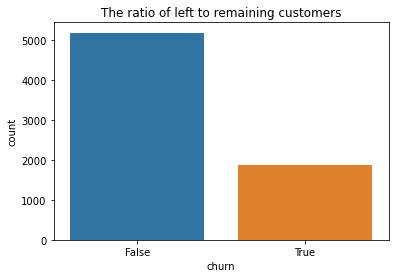

In [26]:
sns.countplot(x ='churn', data = df).set(title='The ratio of left to remaining customers');

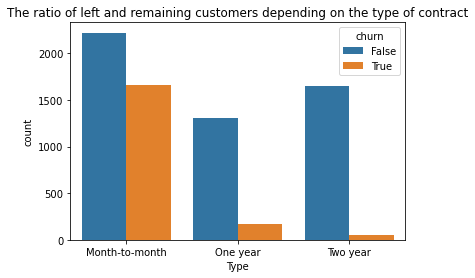

In [27]:
sns.countplot(data=df, x="Type", hue="churn").set(title='The ratio of left and remaining customers depending on the type of contract');

Most of the customers who terminated the contract used the tariff with a monthly payment.

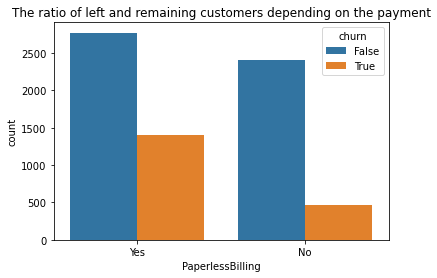

In [28]:
sns.countplot(data=df, x="PaperlessBilling", hue="churn").set(title='The ratio of left and remaining customers depending on the payment');

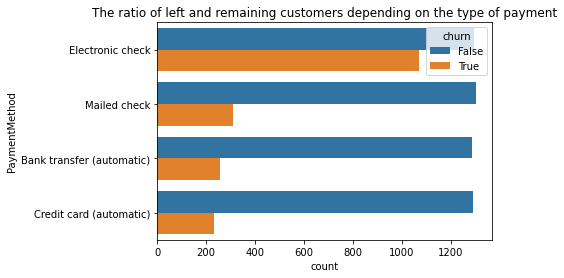

In [29]:
sns.countplot(data=df, y="PaymentMethod", hue="churn").set(title='The ratio of left and remaining customers depending on the type of payment');

Two-thirds of customers who left received an electronic check.

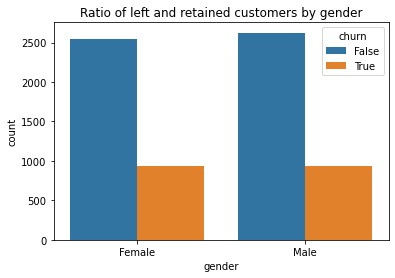

In [30]:
sns.countplot(data=df, x="gender", hue="churn").set(title='Ratio of left and retained customers by gender');

Нет зависимости между полом и фактом, ушел ли клиент

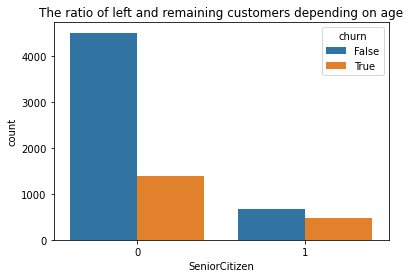

In [31]:
sns.countplot(data=df, x="SeniorCitizen", hue="churn").set(title='The ratio of left and remaining customers depending on age');

The clients who terminated the contract were not senior citizens.

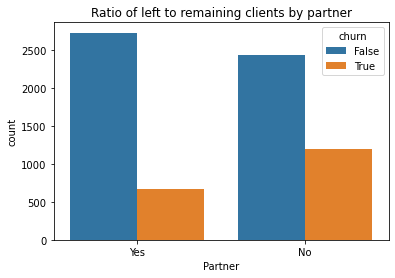

In [32]:
sns.countplot(data=df, x="Partner", hue="churn").set(title='Ratio of left to remaining clients by partner');

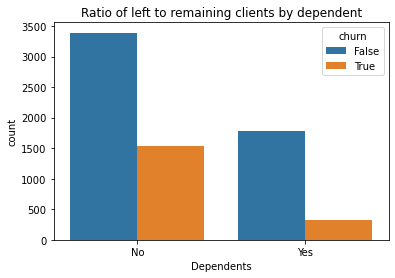

In [33]:
sns.countplot(data=df, x="Dependents", hue="churn").set(title='Ratio of left to remaining clients by dependent');

Most of these clients did not have partners or dependents.

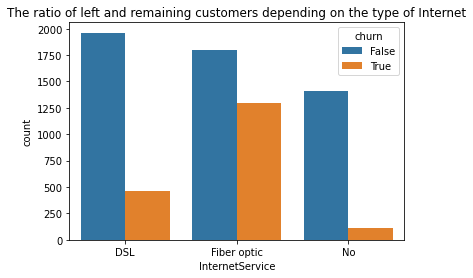

In [34]:
sns.countplot(data=df, x="InternetService", hue="churn").set(title='The ratio of left and remaining customers depending on the type of Internet');

Most of the customers used fiber optics.

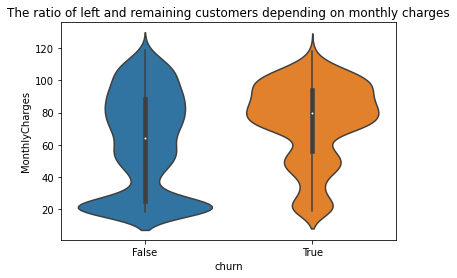

In [35]:
sns.violinplot(x='churn', y='MonthlyCharges', data=df).set(title='The ratio of left and remaining customers depending on monthly charges');

Clients who stayed in the company spend an average of about 20, and those who left about 80-100.

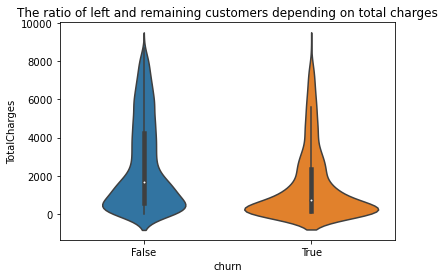

In [36]:
sns.violinplot(x='churn', y='TotalCharges', data=df).set(title='The ratio of left and remaining customers depending on total charges');

The total service fee for the entire time is about the same.

In [37]:
df['days'] = (pd.to_datetime(df['EndDate']) - pd.to_datetime(df['BeginDate'])).dt.days

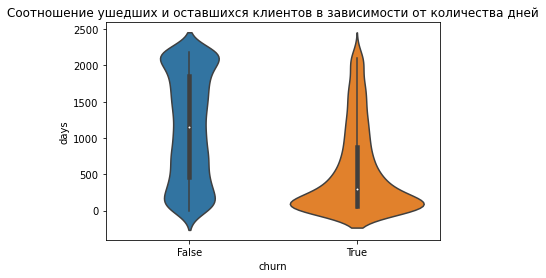

In [38]:
sns.violinplot(x='churn', y='days', data=df).set(title='Соотношение ушедших и оставшихся клиентов в зависимости от количества дней');

Most clients leave within 250 days.

In [39]:
df.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'days'],
      dtype='object')

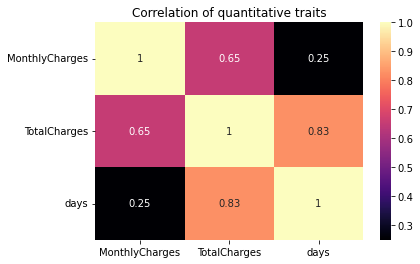

In [40]:
sns.heatmap(df[['MonthlyCharges', 'TotalCharges', 'days']].corr(),  cmap='magma', annot=True)
plt.title('Correlation of quantitative traits');

We can see a correlation between monthly payments and the fact that a customer has left.

We can also replace the correlation between the monthly payments and the total. This correlation is redundant for us, so we can remove the `TotalCharges` column.
In addition, we will remove the columns `customerID`, `BeginDate`, `EndDate`. They are not required for training.

In [41]:
df = df.drop(['customerID', 'TotalCharges', 'BeginDate', 'EndDate'], axis=1)

**Conclusions**

During exploratory data analysis:

- The data has been merged into one table.
- The target attribute has been studied, the number of lost customers is less than twice.
- We can observe the dependence of signs, such as the type of contract and the method of payment on the departure of customers. Customers leave more often if they pay for mobile communications monthly.
- There is a dependence of quantitative signs on the departure of clients, namely the number of days and the monthly fee. The fewer days he or she is a client of the company, the more likely he is to leave. Also, the higher the cost of the monthly fee, the higher the likelihood of care.
- There are no outliers in the data.

## Model training

Preparing data for training. The characteristics with OHE must be prepared. 

In [42]:
df_oe = df.copy()

In [43]:
df_oe['churn'] = df_oe['churn'].astype('int64')

In [44]:
df_oe.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'churn',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'days'],
      dtype='object')

In [45]:
target = df_oe['churn']
features = df_oe.drop(columns='churn')

In [46]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                              test_size = 0.25,
                                                                              random_state = 291122,
                                                                              stratify = target,
                                                                              shuffle = True)

In [47]:
columns_oe = df_oe.columns[(df_oe.dtypes == 'object')]
encoder = OrdinalEncoder()
encoder.fit_transform(features_train[columns_oe])
features_train[columns_oe] = encoder.fit_transform(features_train[columns_oe])
features_test[columns_oe] = encoder.transform(features_test[columns_oe])

In [48]:
df_oe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7043 non-null   object 
 1   PaperlessBilling  7043 non-null   object 
 2   PaymentMethod     7043 non-null   object 
 3   MonthlyCharges    7043 non-null   float64
 4   churn             7043 non-null   int64  
 5   gender            7043 non-null   object 
 6   SeniorCitizen     7043 non-null   int64  
 7   Partner           7043 non-null   object 
 8   Dependents        7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  MultipleLines     7043 non-null   object 


In [49]:
df_oe.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,churn,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days
0,Month-to-month,Yes,Electronic check,29.85,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31
1,One year,No,Mailed check,56.95,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,Month-to-month,Yes,Mailed check,53.85,1,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,61
3,One year,No,Bank transfer (automatic),42.30,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371
4,Month-to-month,Yes,Electronic check,70.70,1,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,61


Let's single out the target and features.

We divide the data into training and test sets.

Let's use Scaler. 

In [50]:
numeric = ['MonthlyCharges','days']

In [51]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

In [52]:
print(f'Shape of train features:  {features_train.shape}')
print(f'Shape of test features:  {features_test.shape}')

Shape of train features:  (5282, 17)
Shape of test features:  (1761, 17)


Let's move on to model traing. Three models were chosen: `RandomForestClassifier`, `LGBMClassifier`, `CatBoostClassifier`. 

### RandomForestClassifier

In [53]:
start = time.time()
param_grid = {'n_estimators': [300],
              'max_depth': [5, 7, 9],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [2, 4, 6],
             }

model_rf = RandomForestClassifier(random_state=291122)
best_rf = GridSearchCV(estimator = model_rf,
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 3,
                           scoring = 'roc_auc')
best_rf.fit(features_train, target_train)
end = time.time()
rf_time = end - start

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [54]:
print('model params: ', best_rf.best_params_)
roc_rf = best_rf.best_score_
print(f'roc_auc: {roc_rf}')

model params:  {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
roc_auc: 0.858886303580814


### LGBMClassifier

In [55]:
start = time.time()
model_lgbm = LGBMClassifier(objective='binary', metric='auc', random_state=291122)
lgbm_params = {
 'max_depth': [3,20,100],
 'n_estimators': [100,300],
 'learning_rate': [0.01]
}


best_lgbm = GridSearchCV(estimator = model_lgbm,
                                param_grid = lgbm_params, 
                                verbose=3,
                                cv=3,
                                n_jobs=-1,
                                scoring='roc_auc')



best_lgbm.fit(features_train, target_train)
end = time.time()
lgbm_time = end - start

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [56]:
print('model params: ', best_lgbm.best_params_)
roc_lgbm = best_lgbm.best_score_
print(f'roc_auc: {roc_lgbm}')

model params:  {'learning_rate': 0.01, 'max_depth': 100, 'n_estimators': 300}
roc_auc: 0.8703722997254074


### CatBoostClassifier

In [57]:
start = time.time()
catboost = CatBoostClassifier(loss_function='Logloss', random_seed=291122,silent=True)

catboost_params = {
 'iterations': [100],
 'learning_rate': [0.1]
}



best_cat = GridSearchCV(catboost,
                                   catboost_params, 
                                   verbose=3,
                                   cv=3,
                                   n_jobs=-1,
                                   scoring='roc_auc')


best_cat.fit(features_train, target_train)
end = time.time()
cat_time = end - start 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [58]:
print('model params: ', best_cat.best_params_)
roc_catboost = best_cat.best_score_
print(f'roc_auc: {roc_catboost}')

model params:  {'iterations': 100, 'learning_rate': 0.1}
roc_auc: 0.8671158111085774


### Analysing the models

In [59]:
table = pd.DataFrame({
    'model': ['RandomForest', 'LightGBM', 'Catboost'],
    'time' : [ rf_time, lgbm_time, cat_time ] , 
    'ROC-AUC': [roc_rf, roc_lgbm, roc_catboost]
})


In [60]:
table

,model,time,ROC-AUC
0,RandomForest,67.868285,0.858886
1,LightGBM,6.666476,0.870372
2,Catboost,3.568595,0.867116


The best model is `LightGBM`.  ROC-AUC is 0.870372, the best parameters of this models are `learning_rate`: 0.01, `max_depth`: 100, `n_estimators`: 300.

Let's make a ROC curve for the best model.

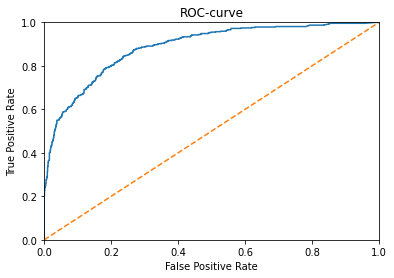

In [61]:
def make_roc_curve(features_test, predict_proba):
    fpr, tpr, thresholds = roc_curve(target_test, predict_proba)

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.show()
    
make_roc_curve(target_test, best_lgbm.predict_proba(features_test)[:, 1])

In [62]:
predict_test = best_lgbm.predict(features_test)

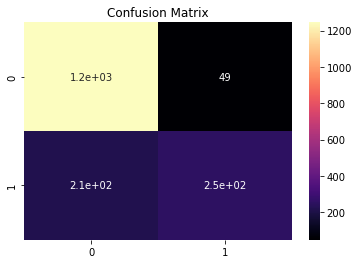

In [63]:
sns.heatmap(confusion_matrix(target_test, predict_test), cmap='magma',  annot=True)
plt.title('Confusion Matrix');

The model is rarely wrong. More likely to predict false negatives. It can be concluded that the prediction accuracy is high.

### Testing the model

Let's check the best model on the test set.

In [64]:
predict_test = best_lgbm.predict_proba(features_test)[:, 1]

In [65]:
roc_auc_score(target_test, predict_test)

0.8862796170101506

ROC-AUC on test set is 0.88627.

In [66]:
importance = pd.DataFrame(data = {'feature': features_train.columns, 'percent': best_lgbm.best_estimator_.feature_importances_})

In [67]:
importance.sort_values('percent',ascending=False).head()

,feature,percent
16,days,3826
3,MonthlyCharges,2115
0,Type,528
2,PaymentMethod,436
8,InternetService,281


Most of all, the client's departure is influenced by the number of days the contract exists and its type, and the monthly payment.

**Conclusion**

During training:

- The data was prepared and divided into training and test sets.
- Three models were chosen: `RandomForestClassifier`, `LGBMClassifier`, `CatBoostClassifier`.
- `RandomForestClassifier` showed an AUC-ROC result of 0.858886 with `max_depth = 9`, `max_features = 7`, `min_samples_leaf' = 2`, `min_samples_split' = 2`, `n_estimators = 300`.
- `LGBMClassifier` showed an AUC-ROC result of 0.870372 with `max_depth = 100`, `learning_rate = 0.01`, `n_estimators' = 300`.
- `CatBoostClassifier` showed AUC-ROC 0.867116 with `iterations = 100`, `learning_rate = 0.1`.
- The best model `LightLGBM`. The ROC-AUC indicator on the test sample is 0.88627.
- Client departure is affected by the number of days, monthly payment and type of contract.

## Report

The purpose of this study was to analyze the data and predict the outflow of customers, which in the future would allow us to develop a system of special conditions that will help retain customers.

The project was carried out in accordance with the plan, all items were completed.

The project consisted of the following sections:

1. Data preparation

In this section, the data has been loaded and a preliminary analysis has been performed. It was found that some features needed to be brought to the correct type.
In addition, gaps were found in the end date of the contract and the total charges, this was due to the fact that customers continue to use the company's services, and new customers have not yet had time to pay the fee. It was decided to put the end date of the contract on 2020-02-01 , and in the total charges column, replace the gaps with 0. No duplicates were found in the data.

2. Exploratory data analysis

In this section, we combined the tables and examined the data in order to identify factors affecting the target. In the target there is an imbalance in the ratio of 1:3. It was decided to leave the imbalance, since the ROC-AUC metric is not sensitive to imbalance.

The dependence of signs can also be observed, such as the type of contract and the method of payment for customer care, the type of Internet. Gender does not affect the target attribute, but the presence of a partner and dependents does, if there is one, then customers are less likely to leave the company.

Thus, it is possible to make a portrait of the departing client. This is a client who has been using the services of the company for less than 2 months, he or she pays every month, his or her average monthly payments range from 60 to 100, which is more than the rest of the clients pay, he or she uses online payment. More often they use fiber optics.
There are no outliers in the data.

3. Train the model

The data were prepared and divided into training and test sets. We performed scaling, coding, and removed unnecessary features. The following models were chosen for training: RandomForestClassifier, LGBMClassifier, CatBoostClassifier. The best model turned out to be LightLGBM, as it showed the highest ROC AUC during training and a good learning rate. The ROC-AUC indicator on the test sample was 0.88627, the best parameters of the model were learning_rate: 0.01, max_depth: 100, n_estimators: 300. In addition, it was important to study how often the model made mistakes. The accuracy of the model was high.
Based on the data of the confusion matrix, we can conclude that the Accuracy of the LGBM model is high 89%, the model practically did not make errors in the prediction.

Signs influencing the predictions were the following number of days and type of contract, monthly fee and type of payment.



Difficulties arose with the OE data encoding, initially the encoding was used before splitting the dataset, but this could lead to data leakage, so it was transferred after, which was used when training on the training set, and was converted on both the training and test sets.

In addition, there was a difficulty, it was to achieve ROC AUC greater than 0.87. The problem was solved by selecting hyperparameters.

The key steps are the analysis of the target feature. It was decided to create a new sign that would allow, using information about the number of days, to determine whether the client left or not and see what could affect this. We have been able to compile a rough profile of an exiting client, and this information can be used to create special conditions and promotions that will increase the duration of use of the company's services.